In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings 
filterwarnings("ignore")

# PART - A

In [2]:
df=pd.read_excel("Sales_Data.xlsx")
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,43155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,43227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small


### 1) Ans:

In [3]:
df.shape

(2747, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,43598.914088,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,230.231295,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,43106.000000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,43412.000000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,43640.000000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,43786.000000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,43982.000000,3562.000000,214.000000


In [6]:
df.describe(include='object')

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
unique,6,7,109,89,88,89,71,73,19,76,72,3
top,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium
freq,2541,949,51,259,259,259,304,259,928,259,259,1349


In [7]:
df.isnull().sum() 

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [8]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [9]:
df.CITY.unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'Burlingame', 'Lille',
       'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'San Diego', 'Bruxelles', 'Tsawassen',
       'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz', 'Makati City',
       'Marseille', 'Koln', 'Gensve', 'Reggio Emilia', 'Frankfurt',
       'Espoo', 'Dublin', 'Manchester', 'Aaarhus', 'Glendale', 'Sevilla',
       'Brisbane', 'Strasbourg', 'Las Vegas', 'Oslo', 'Bergamo',
       'Glen Waverly', 'Munich', 'Charleroi'], dtype=object)

In [10]:
dups=df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### 2) Ans:

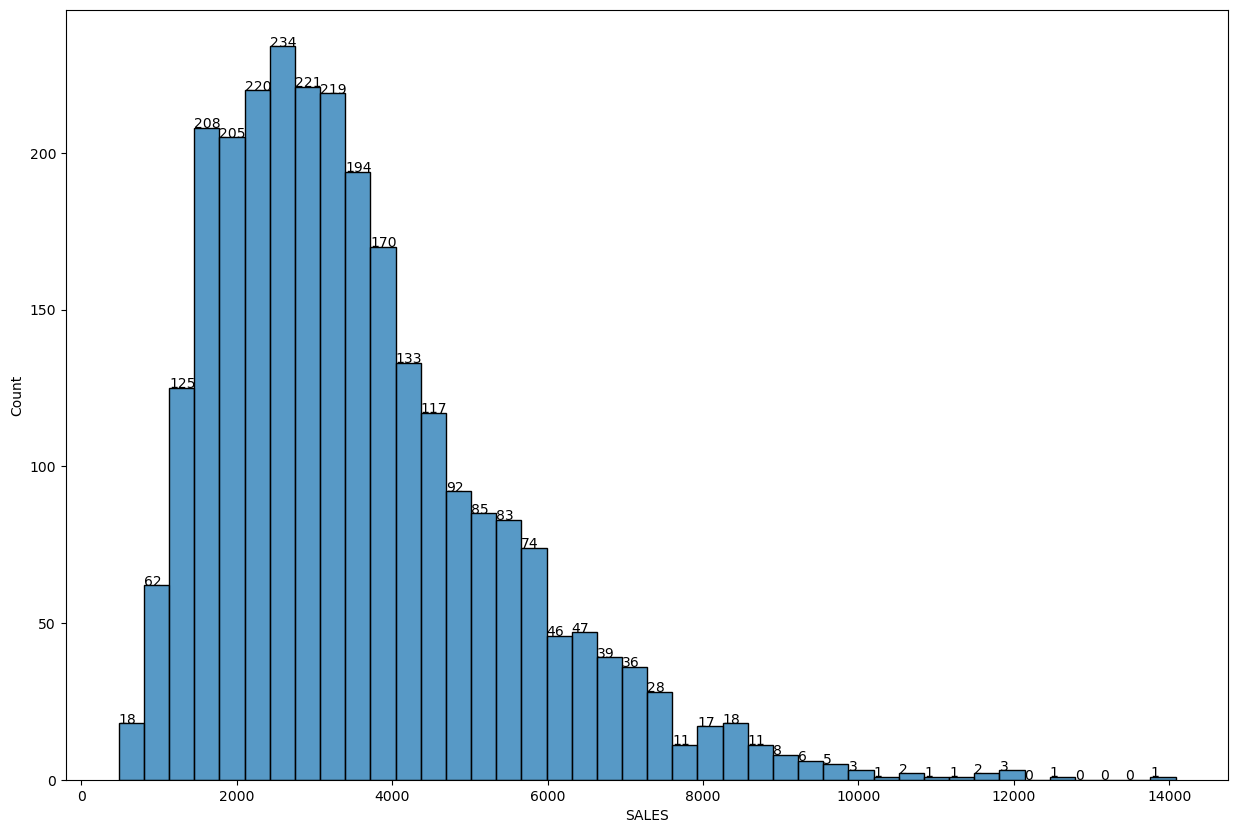

In [11]:
### Sales:
plt.figure(figsize=(15,10))
ax=sns.histplot(df, x = 'SALES')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [12]:
df.SALES.describe()

count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64

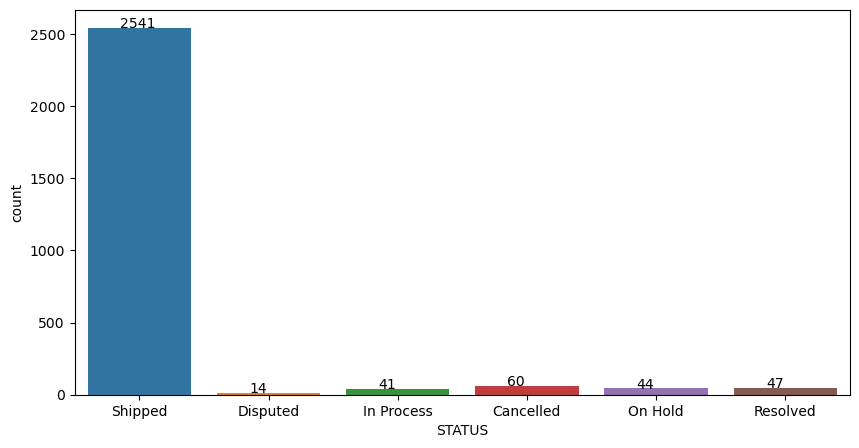

In [13]:
### STATUS:
plt.figure(figsize=(10, 5))
ax=sns.countplot(data=df, x='STATUS')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

## 4) Ans:

In [14]:
df_n=pd.read_excel("RFM_output_final.xlsx")
df_n.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,DEALSIZE,Recency,Monetary,ORDERNUMBER [Binned],Recency [Binned],Monetary [Binned],Recency (#1),Frequency,Monetary (#1),Concatenate
0,10100,37.75,90.1200,2.5,12133.25,4,1429,4,4,90.75,...,4,2219,12133.25,Bin 1,Bin 4,Bin 1,1,1,1,111
1,10101,35.50,95.3425,2.5,11432.34,4,1573,4,4,93.00,...,4,2216,11432.34,Bin 1,Bin 4,Bin 1,1,1,1,111


In [15]:
df_n.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'Recency', 'Monetary', 'ORDERNUMBER [Binned]',
       'Recency [Binned]', 'Monetary [Binned]', 'Recency (#1)', 'Frequency',
       'Monetary (#1)', 'Concatenate'],
      dtype='object')

### BEST CUSTOMERS

In [16]:
a=df_n[['CUSTOMERNAME', 'Concatenate']].sort_values(by = 'Concatenate' , ascending = False).head(7)

In [17]:
a.value_counts()

CUSTOMERNAME                  Concatenate
Euro Shopping Channel         444            2
Mini Gifts Distributors Ltd.  444            2
Gifts4AllAges.com             444            1
Oulu Toy Supplies, Inc.       444            1
Suominen Souveniers           444            1
dtype: int64

### LOST CUSTOMERS

In [18]:
b=df_n[['CUSTOMERNAME', 'Concatenate']].sort_values(by = 'Concatenate' , ascending = True).head(5)

In [19]:
b.value_counts()

CUSTOMERNAME                  Concatenate
Alpha Cognac                  111            1
Atelier graphique             111            1
Australian Collectors, Co.    111            1
Online Diecast Creations Co.  111            1
Reims Collectables            111            1
dtype: int64

### LOYAL CUSTOMERS

In [20]:
c=df_n[['CUSTOMERNAME', 'Recency (#1)']].sort_values(by = 'Recency (#1)' , ascending = False).head(5)

In [21]:
c.value_counts()

CUSTOMERNAME             Recency (#1)
Anna's Decorations, Ltd  4               1
La Rochelle Gifts        4               1
Marseille Mini Autos     4               1
Mini Creations Ltd.      4               1
Suominen Souveniers      4               1
dtype: int64

### VERGE of CHURNING

In [22]:
d=df_n[['CUSTOMERNAME', 'Recency (#1)']].sort_values(by = 'Recency (#1)' , ascending = False).head(5)

In [23]:
d = df_n [['CUSTOMERNAME', 'Concatenate']] [df_n['Concatenate'] == 222]

In [24]:
d.value_counts().head(5)

CUSTOMERNAME                Concatenate
Auto Canal Petit            222            1
Cambridge Collectables Co.  222            1
Vitachrome Inc.             222            1
Toms Spezialitten, Ltd      222            1
Tokyo Collectables, Ltd     222            1
dtype: int64

# PART - B

In [25]:
df1=pd.read_csv("dataset_group.csv")
df1.head(2)

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork


In [26]:
df1.shape

(20641, 3)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [28]:
df1.describe()

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


In [29]:
df1.describe(include='object')

,Date,Product
count,20641,20641
unique,603,37
top,08-02-2019,poultry
freq,183,640


In [30]:
df1.isnull().sum() 

Date        0
Order_id    0
Product     0
dtype: int64

In [31]:
df1.isnull().sum()[df1.isnull().sum()>0]

Series([], dtype: int64)

In [32]:
dups=df1.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 4730


In [33]:
df1.drop_duplicates(inplace=True)

In [34]:
dups=df1.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [35]:
df1.shape

(15911, 3)

In [36]:
#df1.to_csv(r"C:\Users\lenovo\OneDrive\Desktop\Great Learning\yyProject\Module 10 - MRA\Files\dataset_group_dups.csv")

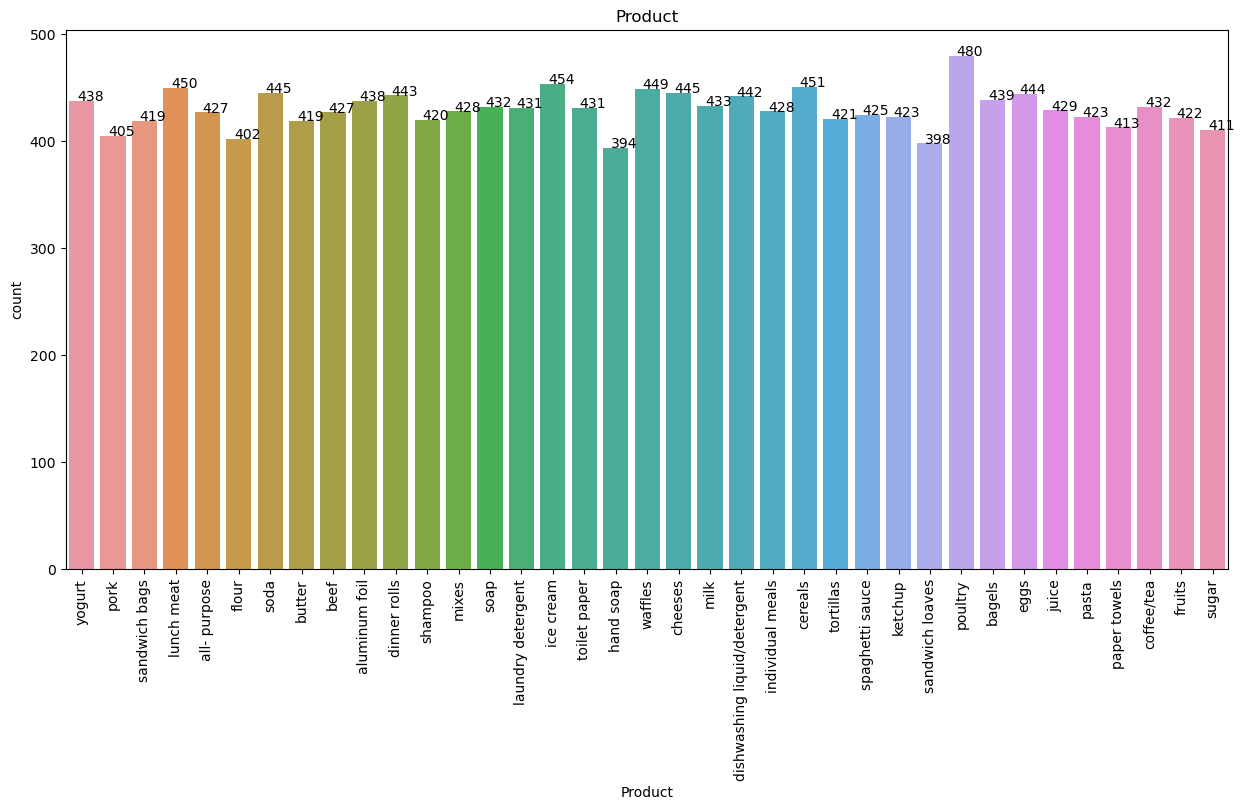

In [37]:
### Product:
plt.figure(figsize=(15, 7))
ax=sns.countplot(data=df1, x='Product')
plt.title ('Product')
plt.xticks(rotation = 90)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));